Index(['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg',
       'DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS'],
      dtype='object')


C:\Users\ghadf\AppData\Local\Temp\ipykernel_36492\1618425153.py:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessor_data.corr()


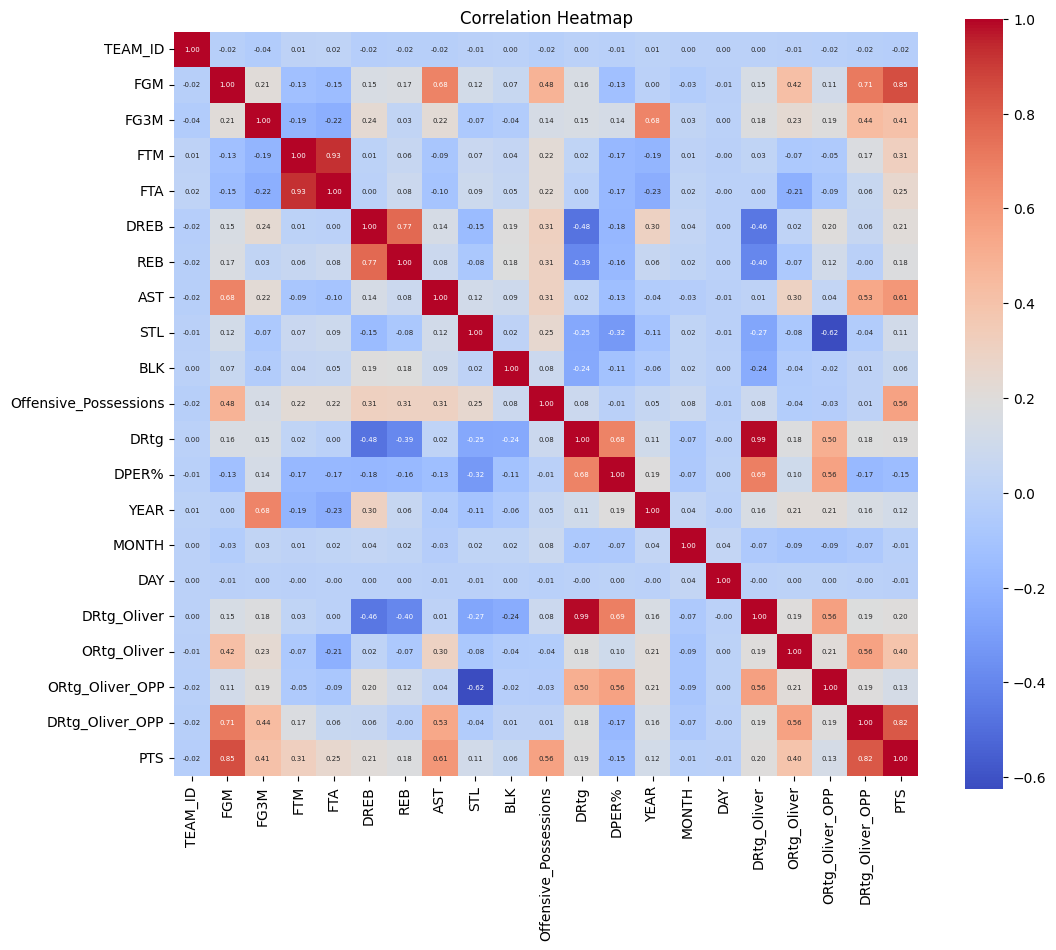

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the data (change to threepoint era data when model is ready)
data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\data\nba\model_preprocessing_store\nba_threeptera_prepreprocess_data.csv')


# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
preprocessor_data = data[[col for col in data.columns if col != 'PTS'] + ['PTS']]

#drop the columns that are not needed
x_excluded_independent_variables = [ 'TEAM_ABBREVIATION', 'WL', 'FGA', 'TOV', 'TEAM_NAME', 'GAME_ID', 'PPM', 'RPM', 'APM', 'SPM', 'BPM', 'TPM',   
                                    'FG_PCT', 'FG3_PCT', 'FT_PCT', 'TS%', 'ORtg', 'PER%', 'PTS_PER_MIN', 'eFG%', 'AST%', 'PTS_PER_MIN_DIFF', 'PTS_DIFF',
                                    'PER', 'OPM', 'DPM', 'USG%', 'FG3A', 'OREB', 'PF', 'MIN', 'SEASON_ID', 'MATCHUP', 'GAME_DATE', #, 
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP'
                                    , 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'SEASON_ID_OPP', 'Home_Away_OPP',  'Defensive_Possessions', #
                                     'TEAM_NAME_OPP', 'WL_OPP', 'MIN_OPP', 'PF_OPP', 'DREB_OPP','PTS_PER_MIN_OPP', 'TEAM_ID_OPP', 'WL_encoded_OPP',
                                      'ORtg_Oliver_DIFF', 'DRtg_Oliver_DIFF', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
                                    'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF', 
                                    'WL_encoded', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 'FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP'
                                     ] #, 'PLUS_MINUS_OPP', 'PLUS_MINUS', 'PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 
                                    #'AST', 'PF', 'STL', 'BLK', 'DREB', 'Offensive_Possessions',
                                     #'FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP',
                                     #  'Defensive_Possessions','ORtg_Oliver_OPP', 'DRtg_Oliver_OPP',
                                    #'DRtg', 'DPER%', 'ORtg_Oliver_OPP', 'ORtg_Oliver_DIFF', 'ORtg_Oliver', 'DRtg_Oliver', 'DRtg_Oliver_OPP'

#drop the columns that are not needed

#preprocessor_data = preprocessor_data.drop(x_excluded_independent_variables, axis=1)
#print(preprocessor_data.columns)

#only include ['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL','BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg','DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver','ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS']
preprocessor_data = preprocessor_data[['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL','BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg','DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver','ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS']]
print(preprocessor_data.columns)
# Create a correlation matrix for the selected columns
correlation_matrix = preprocessor_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

Data reasoning:
ORtg_Oliver and DRtg_Oliver_OPP(1st in corr) are most correlated of ratings to PTS. Your offense is important but the other teams defense is twice as important, in other words: Your defense won't win you as many championships as it will LOSE you championships if you have a bad one

* Offensive Possessions: Just as important as any statistic for PTS, ensure you have your rebounding down to keep up with the other team in chances
* AST is 2nd most for PTS in correlation, ensure you have a team rather than an individual because that will score you more points everytime.

Including FGM, FG3M, FTM. I'm using averages (team avgs per matchup and home/away) to predict the future games rather than actual statistics so there isn't any data leakage. In training there is dropouts to generalize the logic.

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the columns for the dependent (y) and independent (X) variables
y_column = 'PTS'
columns_to_drop = [y_column]


# Define feature lists
categorical_features = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID'] #, 'TEAM_ID_OPP'
numerical_features = [col for col in preprocessor_data.columns if col not in categorical_features + columns_to_drop]

# Transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

one_hot_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('one_hot', one_hot_transformer, categorical_features)
])

# Apply the preprocessor to the data
X = preprocessor_data.drop(columns=columns_to_drop, axis=1)
y = preprocessor_data[y_column]

# Scale the target variable for neural networks to be between 0 and 1
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()


# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the data using the already fitted preprocessor
X_preprocessed = preprocessor.transform(X)

print('Before preprocessing = ', X.shape)
print('After preprocessing = ', X_preprocessed.shape)
print('y shape = ', y.shape)

# Checking if there are any null values after preprocessing
print(pd.DataFrame(X_preprocessed).isnull().sum())


Before preprocessing =  (94996, 22)
After preprocessing =  (94996, 765)
y shape =  (94996,)
0    0
dtype: int64


In [17]:

# Split the data for traditional models
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(X_train)

# Split the data for neural networks
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_preprocessed, y_scaled, test_size=0.2, random_state=42)
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_nn.toarray()).float()
y_train_tensor = torch.tensor(y_train_nn).float().unsqueeze(1)
X_test_tensor = torch.tensor(X_test_nn.toarray()).float()
y_test_tensor = torch.tensor(y_test_nn).float().unsqueeze(1)


  (0, 0)	-0.20389362574277228
  (0, 1)	0.32795147407468056
  (0, 2)	-1.2240402419123118
  (0, 3)	-1.3747040381115097
  (0, 4)	0.9077207659408487
  (0, 5)	1.0864773201255993
  (0, 6)	-0.31893303512513377
  (0, 7)	-0.2870919407152502
  (0, 8)	1.1433298158958574
  (0, 9)	-0.9500171313729483
  (0, 10)	-1.755296233541936
  (0, 11)	-0.8339005591206904
  (0, 12)	-0.1661315822691397
  (0, 13)	-0.6421083479761067
  (0, 14)	0.41217768856711734
  (0, 15)	-1.5730787237902273
  (0, 16)	-0.45179620542598253
  (0, 17)	0.2920303443718984
  (0, 18)	-0.16019807186017115
  (0, 32)	1.0
  (0, 49)	1.0
  (0, 596)	1.0
  (1, 0)	0.3197034854891166
  (1, 1)	-0.5962619195159556
  (1, 2)	-0.0005232365398886641
  :	:
  (75994, 19)	1.0
  (75994, 49)	1.0
  (75994, 86)	1.0
  (75995, 0)	0.8433005967210054
  (75995, 1)	2.6384849580512713
  (75995, 2)	-0.4593421135545473
  (75995, 3)	-0.5104311609470574
  (75995, 4)	0.9077207659408487
  (75995, 5)	1.2348167274961488
  (75995, 6)	1.5145594126942852
  (75995, 7)	-1.6026380

In [18]:
# Hyperparameter tuning
num_epochs = 10
learning_rate = 0.001
dropout_rate = 0.5
batch_size = 64
HIDDEN_SIZE = 512
input_dim = X_train_tensor.shape[1]

In [19]:
# Neural network architecture
class NBA_Score_Predictor(nn.Module):
    def __init__(self, input_dim, hidden_size=HIDDEN_SIZE, dropout_rate=dropout_rate):
        super(NBA_Score_Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)  # Example of using HIDDEN_SIZE to define next layer
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size // 2, 1)  # No activation function here if we're not using MinMax scaling

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)  # Remove the sigmoid if you're going to inverse transform the output
        return x


# Initialize the model
model = NBA_Score_Predictor(input_dim)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Use the learning_rate variable

# DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)  # Use the batch_size variable


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Training loop

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)

    # Calculate the loss
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Calculate evaluation metrics
    predictions_np = predictions.cpu().detach().numpy()  # Convert to numpy array
    y_test_np = y_test_tensor.cpu().detach().numpy()     # Convert to numpy array

    mae = mean_absolute_error(y_test_np, predictions_np)
    mse = mean_squared_error(y_test_np, predictions_np)
    rmse = mean_squared_error(y_test_np, predictions_np, squared=False)

    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Epoch [1/10], Loss: 0.0014
Epoch [2/10], Loss: 0.0004
Epoch [3/10], Loss: 0.0002
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0002
Epoch [6/10], Loss: 0.0004
Epoch [7/10], Loss: 0.0006
Epoch [8/10], Loss: 0.0003
Epoch [9/10], Loss: 0.0004
Epoch [10/10], Loss: 0.0003
Test Loss: 0.0001
Mean Absolute Error (MAE): 0.0064
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0086


In [21]:
from sklearn.metrics import r2_score, explained_variance_score

# Calculate R-squared and Explained Variance Score = This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In other words, it measures how well the regression predictions approximate the real data points. An R-squared of 1 indicates that the regression predictions perfectly fit the data.
r2 = r2_score(y_test_np, predictions_np)
#explained_variance = This metric measures the proportion to which a mathematical model accounts for the variation
#  (dispersion) of a given data set. An explained variance score of 1 indicates perfect prediction.
explained_variance = explained_variance_score(y_test_np, predictions_np)

print(f'R-squared: {r2:.4f}')
print(f'Explained Variance Score: {explained_variance:.4f}')

from sklearn.metrics import mean_squared_log_error

#print(y_test_np)
print(predictions_np)
# Calculate Mean Squared Log Error = This is particularly useful if you want to penalize underestimates more than overestimates.
#  It's useful when you care about percentage errors rather than absolute value errors.
msle = mean_squared_log_error(y_test_np, predictions_np)

print(f'Mean Squared Log Error (MSLE): {msle:.4f}')


R-squared: 0.9936
Explained Variance Score: 0.9936
[[0.25586894]
 [0.3476432 ]
 [0.44356972]
 ...
 [0.5248451 ]
 [0.36969072]
 [0.27386555]]
Mean Squared Log Error (MSLE): 0.0000


In [22]:
from joblib import dump, load

#Save Model and preprocessor
# Define the paths
data_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_season_games_clean.csv'
team_ids_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv'
pipeline_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\linreg_team_preprocessor.joblib'
model_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\linearregression\linreg_team_model.pth'
scaler_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\linreg_team_scalar.joblib'
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\linreg_team_point_pred.csv'

# Save the preprocessor
dump(preprocessor, pipeline_save_path)
#save linreg team scalar
dump(scaler_y, scaler_save_path)

# Save the LSTM model
torch.save(model.state_dict(), model_save_path)

# Load the Preprocessor and Model
loaded_pipeline = load(pipeline_save_path)
scalar_y = load(scaler_save_path)

model = NBA_Score_Predictor(input_dim)
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set the model to evaluation mode

NBA_Score_Predictor(
  (fc1): Linear(in_features=765, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

In [23]:
# Load the data
prediction_data = pd.read_csv(data_path)
print(prediction_data.columns)
included_columns = ['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL','BLK', 'Home_Away', 'MATCHUP_ID',
                     'Offensive_Possessions', 'DRtg','DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
                     'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP']#, 'PTS'
prediction_data = prediction_data[included_columns]
print(prediction_data.head())

Index(['Home_Away', 'WL_encoded', 'TEAM_ID', 'TEAM_ID_OPP', 'YEAR', 'MONTH',
       'DAY', 'MATCHUP_ID', 'Date', 'PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM',
       'FTA', 'AST', 'OREB', 'TOV', 'STL', 'BLK', 'REB', 'MIN', 'DREB',
       'ORtg_Oliver', 'DRtg_Oliver', 'PTS_OPP', 'FGM_OPP', 'FGA_OPP',
       'FG3M_OPP', 'FG3A_OPP', 'FTM_OPP', 'FTA_OPP', 'AST_OPP', 'OREB_OPP',
       'DREB_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'REB_OPP', 'MIN_OPP',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS_PER_MIN', 'FG_PCT',
       'FG3_PCT', 'FT_PCT', 'TS%', 'eFG%', 'AST%', 'Offensive_Possessions',
       'ORtg', 'PER%', 'OFF_EFF', 'PTS_PER_MIN_OPP', 'FG_PCT_OPP',
       'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP',
       'Defensive_Possessions', 'DRtg', 'DPER%', 'PTS_DIFF',
       'PTS_PER_MIN_DIFF', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
       'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF',
       'ORtg_Oliver_DIFF', 'DRtg_Oliver_DIFF'],
      dtype='o

In [24]:
# Preprocess the unseen data
X_unseen_preprocessed = loaded_pipeline.transform(prediction_data)
X_unseen_preprocessed = X_unseen_preprocessed.toarray()
X_unseen_tensor = torch.tensor(X_unseen_preprocessed).float()

# Load the model
model = NBA_Score_Predictor(X_unseen_tensor.shape[1])
model.load_state_dict(torch.load(model_save_path))
model.eval()

# Make predictions using the loaded model
with torch.no_grad():
    unseen_predictions = model(X_unseen_tensor)
    unseen_predictions_np = unseen_predictions.numpy().flatten()

In [25]:

# Inverse transform the predictions
unscaled_predictions = scaler_y.inverse_transform(unseen_predictions_np.reshape(-1, 1)).flatten()


# Convert the unscaled predictions to a DataFrame and concatenate with the original data
unscaled_predictions_df = pd.DataFrame(unscaled_predictions, columns=['PTS'])
prediction_data_with_unscaled_predictions = pd.concat(
    [prediction_data.reset_index(drop=True), unscaled_predictions_df], 
    axis=1
)

# Convert the 'YEAR', 'MONTH', 'DAY' columns to a datetime object
prediction_data_with_unscaled_predictions['Date'] = pd.to_datetime(
    prediction_data_with_unscaled_predictions[['YEAR', 'MONTH', 'DAY']]
)

# Merge with unique teams data
unique_teams = pd.read_csv(team_ids_path)[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_unscaled_predictions.merge(unique_teams, on='TEAM_ID', how='left')

# Filter for the games of interest, for example, today's games
today = pd.Timestamp.today().normalize()
prediction_data_today = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Save the predictions to a CSV file
#prediction_data_today.to_csv(saved_predictions_path, index=False)

# Display the predictions
print(prediction_data_today)

      TEAM_ID   FGM  FG3M   FTM   FTA  DREB   REB   AST   STL  BLK  ... MONTH  \
0  1610612738  40.5  14.5  24.5  30.0  32.5  38.5  27.5   7.0  3.0  ...    12   
1  1610612744  41.5  14.0  15.0  17.0  32.0  40.0  29.0   6.0  5.0  ...    12   
2  1610612756  45.5  16.5  24.5  29.5  36.5  47.5  32.0   6.5  6.0  ...    12   
3  1610612758  55.5  14.5  24.0  32.5  34.5  44.5  32.0  12.5  4.5  ...    12   
4  1610612746  46.0  17.5  26.0  31.0  34.0  46.0  27.0   6.0  3.0  ...    12   
5  1610612739  45.0  13.0  19.5  27.5  30.5  40.0  19.5   6.5  2.5  ...    12   
6  1610612747  40.5   7.5  24.5  30.0  34.0  45.5  21.5   7.0  3.0  ...    12   
7  1610612742  41.5  19.0  14.0  19.5  32.0  43.0  26.0   5.5  4.0  ...    12   
8  1610612743  47.5  16.5  13.5  17.0  30.0  37.5  34.0  12.5  6.5  ...    12   
9  1610612741  45.5  10.0  17.0  19.5  29.0  46.0  29.0  12.5  2.5  ...    12   

  DAY  DRtg_Oliver  ORtg_Oliver  ORtg_Oliver_OPP  DRtg_Oliver_OPP         PTS  \
0  12   121.601341    73.47

In [26]:
# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(unseen_predictions_np, columns=['PTS'])
#make date out of 'YEAR', 'MONTH', 'DAY'
prediction_data['Date'] = pd.to_datetime(prediction_data[['YEAR', 'MONTH', 'DAY']])

# Concatenate the predictions to the original data
prediction_data_with_predictions = pd.concat([prediction_data.reset_index(drop=True), predictions_df], axis=1)

prediction_data_with_predictions['Date'] = pd.to_datetime(prediction_data_with_predictions[['YEAR', 'MONTH', 'DAY']])


# Merge with unique teams data
df1 = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv')
unique_teams = df1[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_unscaled_predictions.merge(unique_teams, on='TEAM_ID', how='left')
print(prediction_data_with_results.columns)

# Filter for the games of interest, if necessary
# For example, if you want to filter for today's games:
today = pd.Timestamp.today().normalize()
prediction_data_today = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Display the predictions
print(prediction_data_today[['TEAM_NAME', 'PTS']])


Index(['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg',
       'DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION'],
      dtype='object')
               TEAM_NAME         PTS
0         Boston Celtics  119.382698
1  Golden State Warriors  113.943832
2           Phoenix Suns  131.703262
3       Sacramento Kings  147.208572
4            LA Clippers  134.413315
5    Cleveland Cavaliers  121.059395
6     Los Angeles Lakers  113.365082
7       Dallas Mavericks  116.986580
8         Denver Nuggets  122.745033
9          Chicago Bulls  116.546295


In [27]:
#Checks for the range of the predictions to ensure that they are within the range of the original data
# Use inverse_transform to get the unscaled predictions
unscaled_predictions = scaler_y.inverse_transform(predictions_np.reshape(-1, 1)).flatten()

# Check the range of the unscaled predictions
print(f"Original y_train min: {y_train.min()}, max: {y_train.max()}")
print(f"Original y_test min: {y_test.min()}, max: {y_test.max()}")
print(f"Unscaled training predictions min: {unscaled_predictions.min()}, max: {unscaled_predictions.max()}")

# Use inverse_transform to get the unscaled predictions
unscaled_predictions = scaler_y.inverse_transform(unseen_predictions_np.reshape(-1, 1)).flatten()
print(f"Unscaled unseen predictions min: {unscaled_predictions.min()}, max: {unscaled_predictions.max()}")

Original y_train min: 54, max: 173
Original y_test min: 49, max: 176
Unscaled training predictions min: 51.308189392089844, max: 175.085205078125
Unscaled unseen predictions min: 113.36508178710938, max: 147.2085723876953


In [28]:
#sort by the matchup id and display the predictions, team name, and matchup id
prediction_data_today = prediction_data_today.sort_values(by=['MATCHUP_ID'])
print(prediction_data_today[['TEAM_NAME', 'PTS', 'MATCHUP_ID', 'Home_Away', 'TEAM_ID']])

               TEAM_NAME         PTS MATCHUP_ID Home_Away     TEAM_ID
0         Boston Celtics  119.382698     BOSCLE      Home  1610612738
5    Cleveland Cavaliers  121.059395     BOSCLE      Away  1610612739
8         Denver Nuggets  122.745033     CHIDEN      Away  1610612743
9          Chicago Bulls  116.546295     CHIDEN      Home  1610612741
6     Los Angeles Lakers  113.365082     DALLAL      Away  1610612747
7       Dallas Mavericks  116.986580     DALLAL      Home  1610612742
1  Golden State Warriors  113.943832     GSWPHX      Away  1610612744
2           Phoenix Suns  131.703262     GSWPHX      Home  1610612756
3       Sacramento Kings  147.208572     LACSAC      Away  1610612758
4            LA Clippers  134.413315     LACSAC      Home  1610612746


In [29]:
#split up dataset into two dataframes, one for home teams and one for away teams and then remerge them by matchup_id
home_teams = prediction_data_today[prediction_data_today['Home_Away'] == 'Home']
away_teams = prediction_data_today[prediction_data_today['Home_Away'] == 'Away']
print(home_teams.columns)

#merge the two dataframes by matchup_id, adding a suffix to the column names to differentiate between the two
home_away_teams = pd.merge(home_teams[['TEAM_NAME', 'TEAM_ID', 'PTS', 'MATCHUP_ID', 'Date']], away_teams[['TEAM_NAME', 'TEAM_ID', 'PTS', 'MATCHUP_ID', 'Date']], on=['MATCHUP_ID', 'Date'] , how='left', suffixes=('_HOME', '_AWAY'))

#add win/loss column for home and away team
home_away_teams['HOME_WIN'] = np.where(home_away_teams['PTS_HOME'] > home_away_teams['PTS_AWAY'], 0, 1)
home_away_teams['AWAY_WIN'] = np.where(home_away_teams['PTS_AWAY'] > home_away_teams['PTS_HOME'], 0, 1)
print(home_away_teams) #0 is a win, 1 is a loss

Index(['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg',
       'DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION'],
      dtype='object')
     TEAM_NAME_HOME  TEAM_ID_HOME    PTS_HOME MATCHUP_ID       Date  \
0    Boston Celtics    1610612738  119.382698     BOSCLE 2023-12-12   
1     Chicago Bulls    1610612741  116.546295     CHIDEN 2023-12-12   
2  Dallas Mavericks    1610612742  116.986580     DALLAL 2023-12-12   
3      Phoenix Suns    1610612756  131.703262     GSWPHX 2023-12-12   
4       LA Clippers    1610612746  134.413315     LACSAC 2023-12-12   

          TEAM_NAME_AWAY  TEAM_ID_AWAY    PTS_AWAY  HOME_WIN  AWAY_WIN  
0    Cleveland Cavaliers    1610612739  121.059395         1         0  
1         Denver Nuggets    1610612743  122.745033         1         0  
2     Los 

In [30]:
from datetime import datetime
import pandas as pd
import os

# 1. Create a DataFrame for today's outcomes based on prediction_data
today_predictions = home_away_teams.copy()

# 2. Add today's date and recording timestamp
today_predictions['date_prediction_recorded'] = pd.Timestamp.today()

#filter for ATLCHA matchup_id
#today_predictions = today_predictions[today_predictions['MATCHUP_ID'] == 'ATLCHA']

# Define the path to the saved predictions
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\linreg_team_point_pred.csv'

# 3. Check if the saved predictions file exists
if not os.path.exists(saved_predictions_path):
    # If it doesn't exist, create it from today's predictions
    today_predictions.to_csv(saved_predictions_path, index=False)
    print(today_predictions.shape)
else:
    # If it exists, load it and update
    saved_predictions = pd.read_csv(saved_predictions_path)
    # Normalize the 'Date' column to remove time portion
    saved_predictions['Date'] = pd.to_datetime(saved_predictions['Date']).dt.normalize()

    print(saved_predictions.shape)

    print(today_predictions.shape)
    # 4. Concatenate existing and new predictions
    all_predictions = pd.concat([saved_predictions, today_predictions], ignore_index=True)
    
    # 5. Sort by date recorded, matchup id, and home_away
    all_predictions.sort_values(by=['date_prediction_recorded', 'MATCHUP_ID', 'TEAM_NAME_HOME'], ascending=[True, True, True], inplace=True)
    
    all_predictions['Date'] = pd.to_datetime(all_predictions['Date']).dt.normalize()
    
    # 6. Remove duplicates, keeping only the newest entry and not deleting previous days predictions
    all_predictions.drop_duplicates(subset=['MATCHUP_ID', 'TEAM_ID_HOME', 'Date'], keep='first', inplace=True)

    # Sort by date and reset index
    all_predictions = all_predictions.sort_values(by=['Date']).reset_index(drop=True)
    
    # 7. Save the updated DataFrame back to CSV
    all_predictions.to_csv(saved_predictions_path, index=False)

# 8. Display the results
all_predictions.sort_values(by=['Date'], ascending=[True], inplace=True)
print(all_predictions)
print(all_predictions.shape)

(175, 11)
(5, 11)
        TEAM_NAME_HOME  TEAM_ID_HOME    PTS_HOME MATCHUP_ID       Date  \
0      Houston Rockets    1610612745  108.890640     HOUNOP 2023-11-10   
7         Phoenix Suns    1610612756  119.287529     LALPHX 2023-11-10   
6    San Antonio Spurs    1610612759  118.488853     MINSAS 2023-11-10   
5      Detroit Pistons    1610612765  109.081917     DETPHI 2023-11-10   
8    Memphis Grizzlies    1610612763  118.735046     MEMUTA 2023-11-10   
..                 ...           ...         ...        ...        ...   
178      Chicago Bulls    1610612741  116.546295     CHIDEN 2023-12-12   
175        LA Clippers    1610612746  134.413315     LACSAC 2023-12-12   
176       Phoenix Suns    1610612756  131.703262     GSWPHX 2023-12-12   
177   Dallas Mavericks    1610612742  116.986580     DALLAL 2023-12-12   
179     Boston Celtics    1610612738  119.382698     BOSCLE 2023-12-12   

             TEAM_NAME_AWAY  TEAM_ID_AWAY    PTS_AWAY  HOME_WIN  AWAY_WIN  \
0      New Orlea

In [31]:
past_results_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_current_season_prediction_tracker.csv'

# Load the past results
past_results = pd.read_csv(past_results_path)
#print(past_results.head())

past_results = past_results[['GAME_DATE', 'TEAM_ID', 'TEAM_NAME', 'MATCHUP_ID', 'WL_encoded', 'PTS']]

past_results = past_results.rename(columns={'GAME_DATE': 'Date'})


#filter for date 2023-11-16
#past_results = past_results[past_results['Date'] == '2023-11-17']
#all_predictions = all_predictions[all_predictions['Date'] == '2023-11-17']

#past_results = past_results.sort_values(by=['Date'], ascending=[False]) #, inplace=True

#filter Date for only 11-10-2023
#past_results = past_results[past_results['Date'] == '2023-11-10']
#print(past_results.shape)
#past_results = past_results[past_results['TEAM_NAME'] == 'Los Angeles Lakers']
#print(past_results.head())
#print(past_results.shape)
#and for matchup LALPHX         

# Check data types
#change date to object
all_predictions['Date'] = all_predictions['Date'].astype(str)
#all_predictions = all_predictions[all_predictions['Date'] == '2023-11-10']


#print(past_results[['Date', 'TEAM_ID', 'MATCHUP_ID']].dtypes)
#print(all_predictions[['Date', 'TEAM_ID_HOME', 'MATCHUP_ID']].dtypes)

#put the home and away teams concatenated together into one dataframe to compare to past results
home_teams = all_predictions[['TEAM_NAME_HOME', 'TEAM_ID_HOME', 'PTS_HOME','HOME_WIN', 'MATCHUP_ID', 'Date']]
away_teams = all_predictions[['TEAM_NAME_AWAY', 'TEAM_ID_AWAY', 'PTS_AWAY','AWAY_WIN', 'MATCHUP_ID', 'Date']]

#change team_name_home to team_name
home_teams = home_teams.rename(columns={'TEAM_NAME_HOME': 'TEAM_NAME', 'TEAM_ID_HOME': 'TEAM_ID' , 'PTS_HOME': 'PTS', 'HOME_WIN': 'WL_encoded'})

#change team_name_home to team_name
away_teams = away_teams.rename(columns={'TEAM_NAME_AWAY': 'TEAM_NAME', 'TEAM_ID_AWAY': 'TEAM_ID', 'PTS_AWAY': 'PTS', 'AWAY_WIN': 'WL_encoded'})

#concatenate the two dataframes
all_data = pd.concat([home_teams, away_teams], ignore_index=True)

#all_data = all_data[all_data['MATCHUP_ID'] == 'LALPHX']
print(all_data)
print(all_data.shape)

#print(past_results)
print(past_results.shape)

past_data_with_predictions = pd.merge(past_results, all_data, on=['Date', 'TEAM_ID', 'MATCHUP_ID'], #, 'TEAM_NAME'
                                      how='inner', suffixes=('', '_predictions')) #, validate='one_to_one'
#print(past_data_with_predictions.shape)
#rename WL_encoded_predictions to linreg_nn_predictions
past_data_with_predictions = past_data_with_predictions.rename(columns={'WL_encoded_predictions': 'linreg_nn_predictions'})
print(past_data_with_predictions.shape)
#print(past_data_with_predictions)

                 TEAM_NAME     TEAM_ID         PTS  WL_encoded MATCHUP_ID  \
0          Houston Rockets  1610612745  108.890640           1     HOUNOP   
1             Phoenix Suns  1610612756  119.287529           0     LALPHX   
2        San Antonio Spurs  1610612759  118.488853           1     MINSAS   
3          Detroit Pistons  1610612765  109.081917           1     DETPHI   
4        Memphis Grizzlies  1610612763  118.735046           0     MEMUTA   
..                     ...         ...         ...         ...        ...   
355         Denver Nuggets  1610612743  122.745033           0     CHIDEN   
356       Sacramento Kings  1610612758  147.208572           0     LACSAC   
357  Golden State Warriors  1610612744  113.943832           1     GSWPHX   
358     Los Angeles Lakers  1610612747  113.365082           1     DALLAL   
359    Cleveland Cavaliers  1610612739  121.059395           0     BOSCLE   

           Date  
0    2023-11-10  
1    2023-11-10  
2    2023-11-10  
3  

In [32]:
past_data_with_predictions.sort_values(by='Date', inplace=True)

#if right about WL_encoded to linreg_nn_predictions, then add 1 to correct column and 0 otherwise
past_data_with_predictions['Correct'] = np.where(past_data_with_predictions['WL_encoded'] == past_data_with_predictions['linreg_nn_predictions'], 1, 0)
#print(past_data_with_predictions[['Correct', 'MAE', 'MATCHUP_ID']])

# First, calculate the point differences
past_data_with_predictions['Point_Diff'] = abs(past_data_with_predictions['PTS'] - past_data_with_predictions['PTS_predictions'])

# Now calculate the cumulative MAE
# We create a new column 'Cumulative_MAE' which computes the cumulative mean of 'Point_Diff'
past_data_with_predictions['Cumulative_MAE'] = past_data_with_predictions['Point_Diff'].expanding().mean()

# Next, we calculate the correct percentage
# We have the 'Correct' column already. We'll calculate the cumulative sum of this column
past_data_with_predictions['Cumulative_Correct'] = past_data_with_predictions['Correct'].expanding().sum()

# We'll also need the cumulative count of games predicted
past_data_with_predictions['Games_Predicted'] = past_data_with_predictions['Correct'].expanding().count()

# Now we can calculate the cumulative correct percentage
past_data_with_predictions['Cumulative_Correct_Percentage'] = past_data_with_predictions['Cumulative_Correct'] / past_data_with_predictions['Games_Predicted']

# Now you can save this DataFrame to a CSV file or inspect it
print(past_data_with_predictions[['Date', 'MATCHUP_ID', 'Correct', 'PTS', 'PTS_predictions', 'Cumulative_MAE', 'Cumulative_Correct_Percentage']])

# Optionally, save to CSV
# past_data_with_predictions.to_csv('updated_predictions_tracker.csv', index=False)


           Date MATCHUP_ID  Correct  PTS  PTS_predictions  Cumulative_MAE  \
55   2023-11-10     OKCSAC        1   98       110.570839       12.570839   
52   2023-11-10     MINSAS        1  110       118.488853       10.529846   
60   2023-11-10     MEMUTA        0  121       118.735046        7.774882   
57   2023-11-10     MEMUTA        0  127       115.034164        8.822620   
63   2023-11-10     CHAWAS        0  117       106.569557        9.144185   
..          ...        ...      ...  ...              ...             ...   
130  2023-12-11     MINNOP        0  121       108.623177       11.587170   
326  2023-12-11     DETIND        0  131       107.187927       11.620300   
327  2023-12-11     DETIND        0  123       115.318642       11.609654   
253  2023-12-11     CHAMIA        0  114       113.824776       11.578833   
131  2023-12-11     MINNOP        0  107       113.725685       11.565787   

     Cumulative_Correct_Percentage  
55                        1.000000  
5

In [33]:
print(past_data_with_predictions[['Date', 'MATCHUP_ID', 'Correct', 'Cumulative_MAE', 'Cumulative_Correct_Percentage']].tail(15))


           Date MATCHUP_ID  Correct  Cumulative_MAE  \
303  2023-12-11     NYKTOR        0       11.350353   
232  2023-12-11     LACPOR        1       11.334309   
302  2023-12-11     NYKTOR        0       11.364126   
334  2023-12-11     PHIWAS        1       11.398016   
108  2023-12-11     CLEORL        0       11.430342   
109  2023-12-11     CLEORL        0       11.401840   
223  2023-12-11     HOUSAS        1       11.460937   
222  2023-12-11     HOUSAS        1       11.507820   
152  2023-12-11     CHIMIL        1       11.546449   
153  2023-12-11     CHIMIL        1       11.585018   
130  2023-12-11     MINNOP        0       11.587170   
326  2023-12-11     DETIND        0       11.620300   
327  2023-12-11     DETIND        0       11.609654   
253  2023-12-11     CHAMIA        0       11.578833   
131  2023-12-11     MINNOP        0       11.565787   

     Cumulative_Correct_Percentage  
303                       0.620112  
232                       0.621170  
302     